In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import scipy.fft
import matplotlib.pyplot as plt

from pyinverse.phantom import Phantom
from pyinverse.axis import RegularAxis
from pyinverse.grid import RegularGrid

In [3]:
Nx = 64
Ny = 64
Na = 64
Np = 64

In [4]:
R_fname = f'/tmp/R_{Nx}_{Ny}_{Na}_{Np}.npz'
R = scipy.sparse.load_npz(R_fname)

In [5]:
axis_x = RegularAxis.linspace(-1, 1, Nx)
axis_y = RegularAxis.linspace(-1, 1, Ny)
axis_t = RegularAxis.linspace(-1, 1, Np)
axis_theta = RegularAxis.linspace(0, 180, Na, endpoint=False)

In [6]:
grid = RegularGrid(axis_x, axis_y)
grid_y = RegularGrid(axis_theta, axis_t)

In [7]:
p = Phantom()

In [8]:
y = p.sinogram(grid_y, rect=True)

<IPython.core.display.Javascript object>


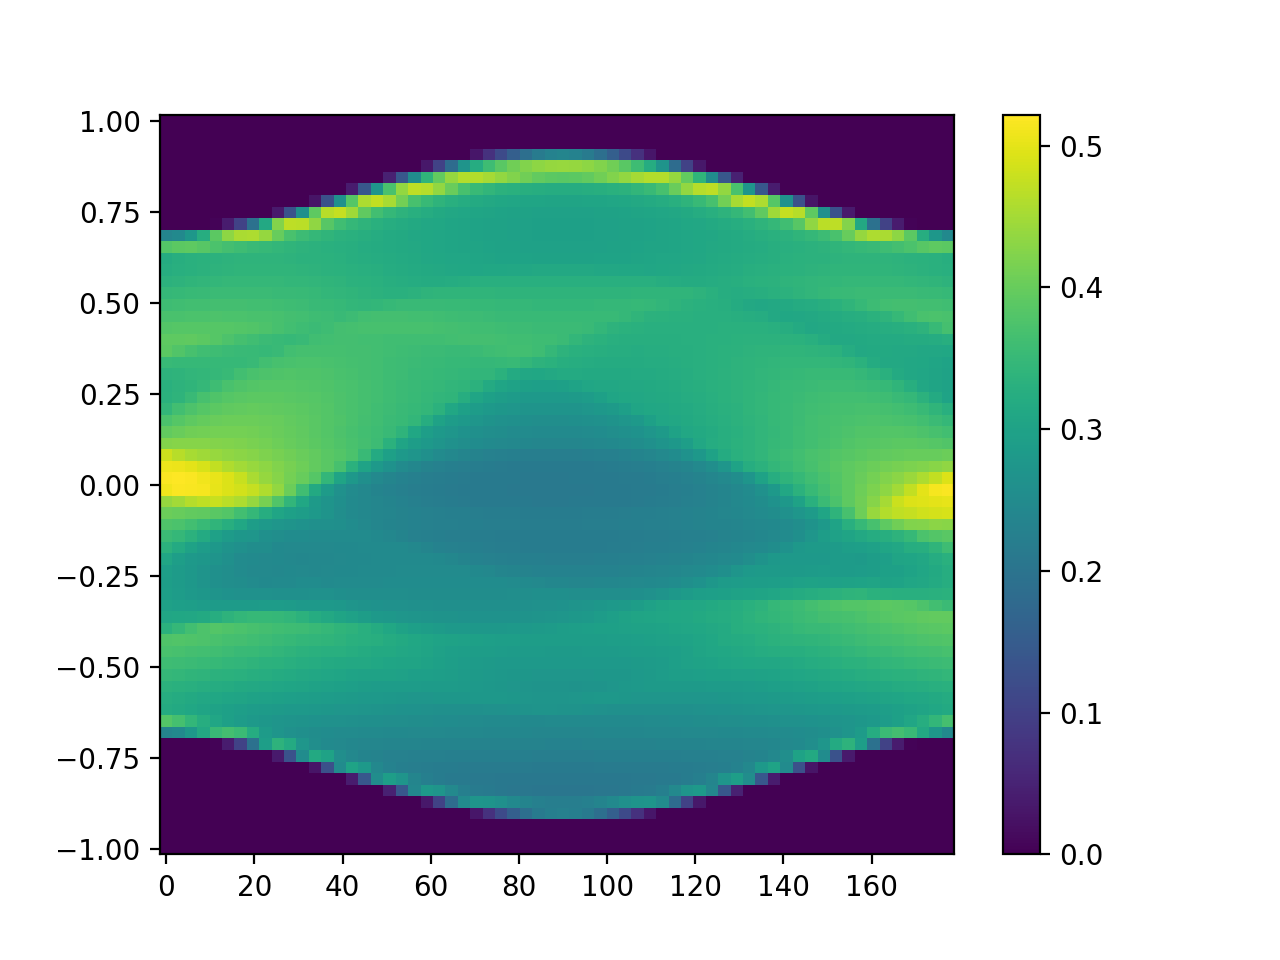

In [9]:
fig, ax = plt.subplots()
im = grid_y.plot(ax, y, aspect='auto')
fig.colorbar(im);

In [10]:
Omega_t = scipy.fft.fftfreq(Np, d=axis_t.T/(2*np.pi))
F_t = Omega_t / (2 * np.pi)

In [11]:
y_ft_hand = scipy.fft.fft(scipy.fft.fftshift(y, axes=0), axis=0)

<IPython.core.display.Javascript object>


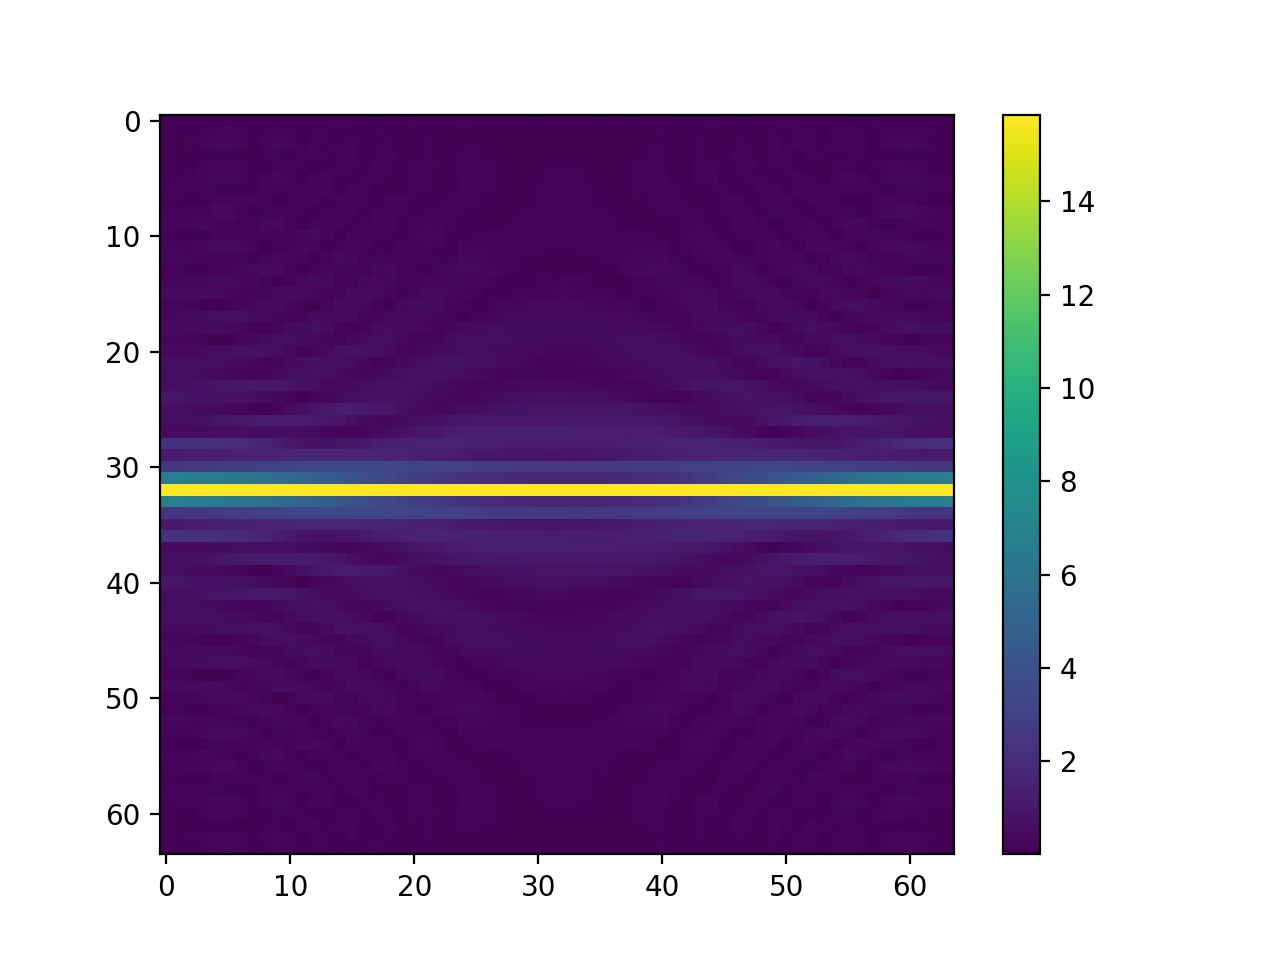

In [12]:
fig, ax = plt.subplots()
im = plt.imshow(scipy.fft.fftshift(np.abs(y_ft_hand), axes=0), aspect='auto')
fig.colorbar(im)

In [13]:
W = np.abs(F_t)

<IPython.core.display.Javascript object>


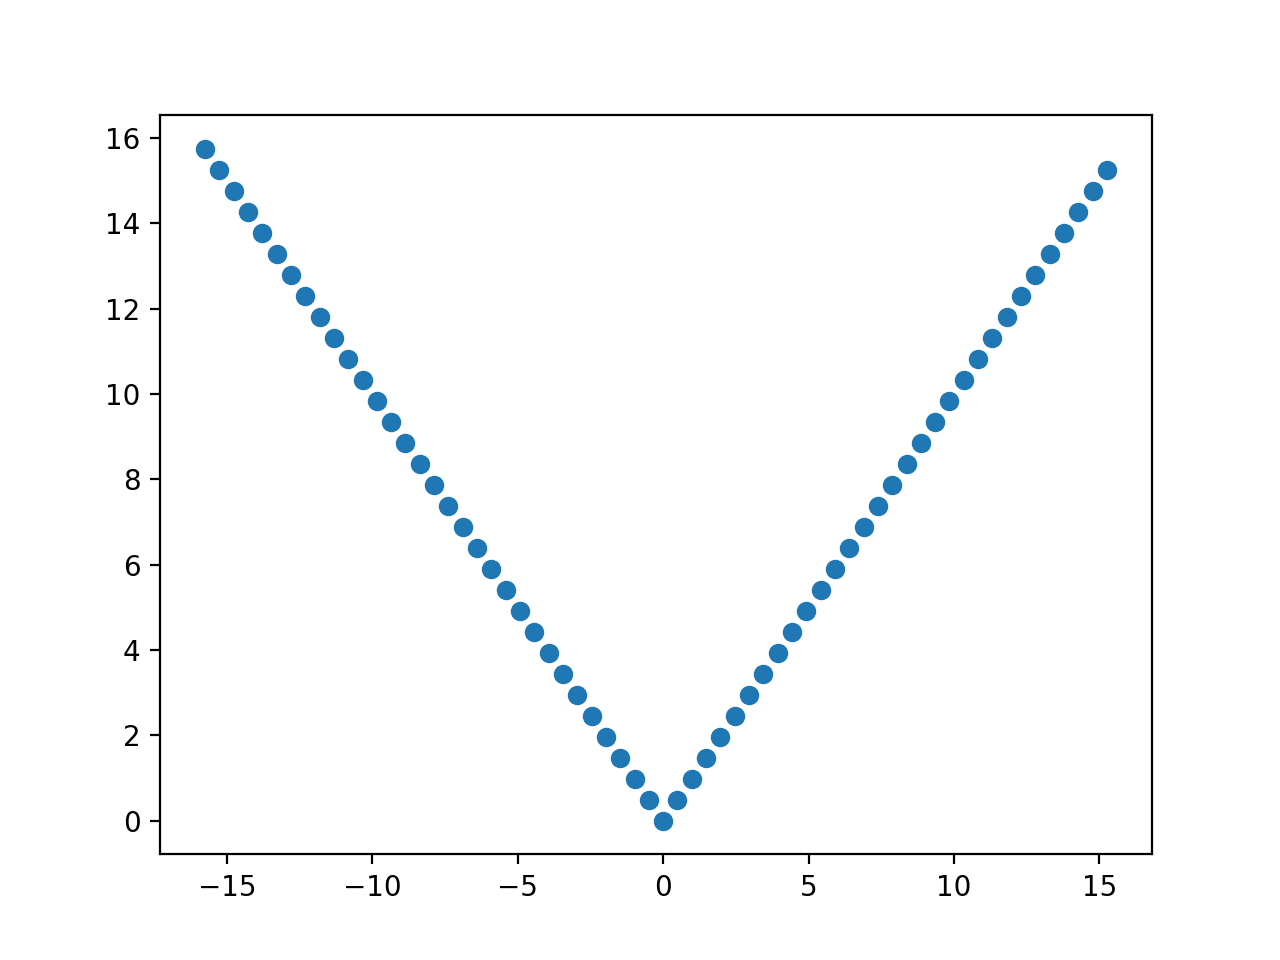

In [14]:
fig, ax = plt.subplots()
plt.scatter(F_t, W);

In [15]:
z_ft_hand = np.atleast_2d(W).T * y_ft_hand

<IPython.core.display.Javascript object>


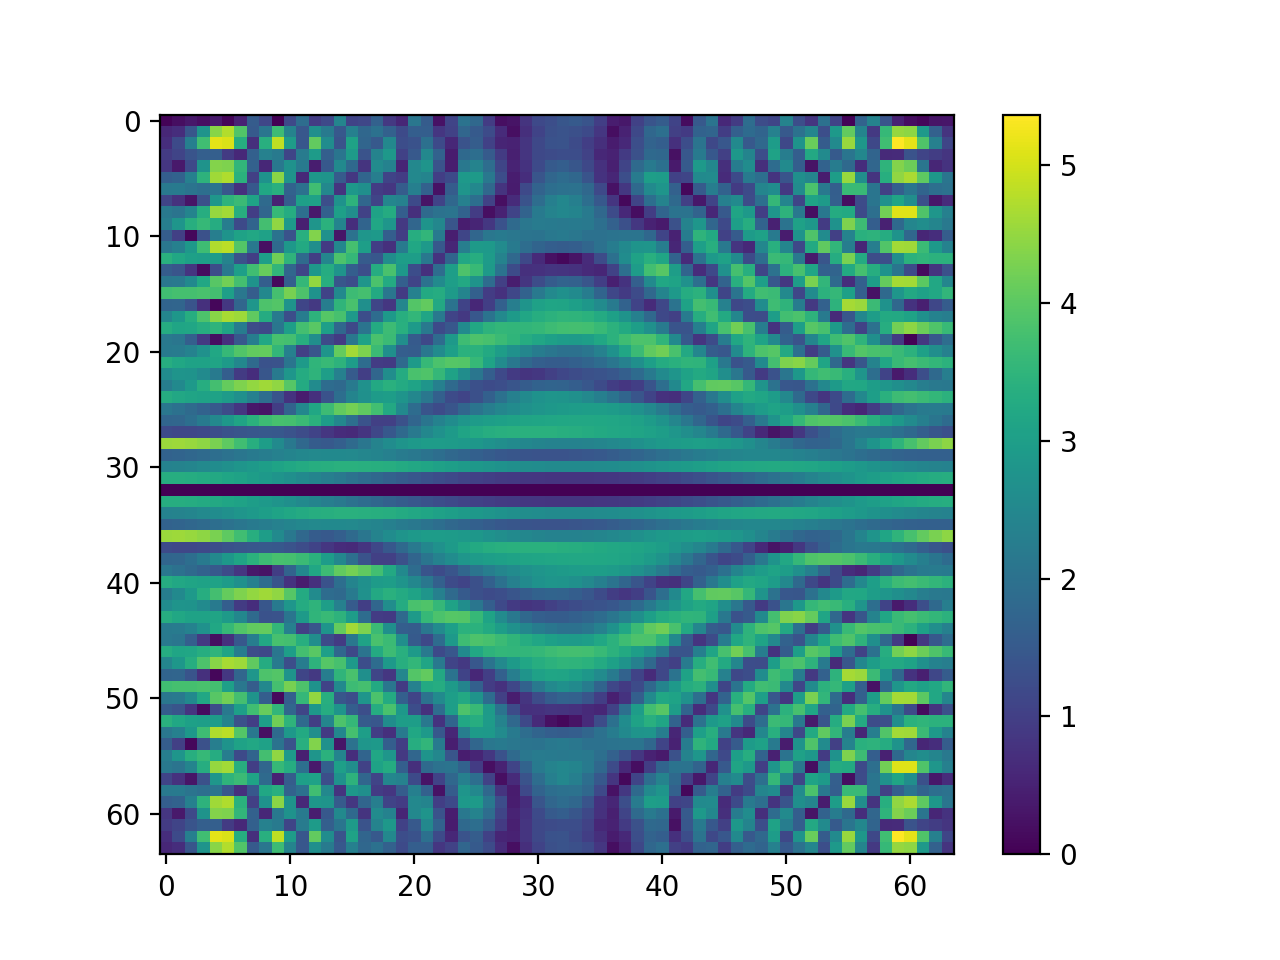

In [16]:
fig, ax = plt.subplots()
im = plt.imshow(scipy.fft.fftshift(np.abs(z_ft_hand), axes=0), aspect='auto')
fig.colorbar(im)

In [17]:
y_no_filter = scipy.fft.ifftshift(np.real(scipy.fft.ifft(y_ft_hand, axis=0)), axes=0)

In [18]:
x_hat_no_filter = R.T @ y_no_filter.flat
x_hat_no_filter.shape = Ny, Nx

<IPython.core.display.Javascript object>


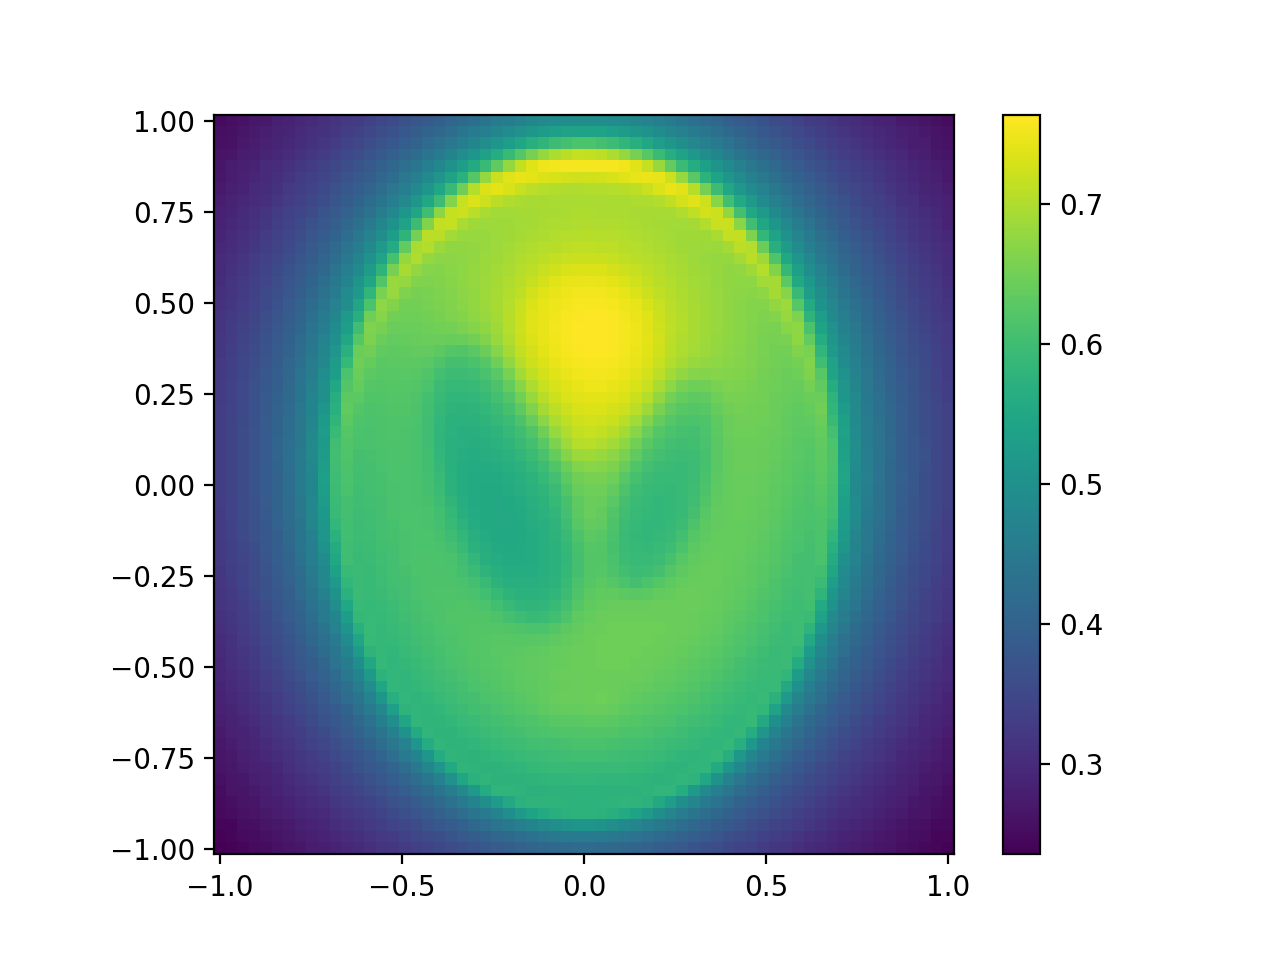

In [19]:
fig, ax = plt.subplots()
im = grid.plot(ax, x_hat_no_filter)
fig.colorbar(im);

In [20]:
y_filtered = scipy.fft.ifftshift(np.real(scipy.fft.ifft(z_ft_hand, axis=0)), axes=0) * 2

In [21]:
x_hat_fbp = R.T @ y_filtered.flat
x_hat_fbp.shape = Ny, Nx

<IPython.core.display.Javascript object>


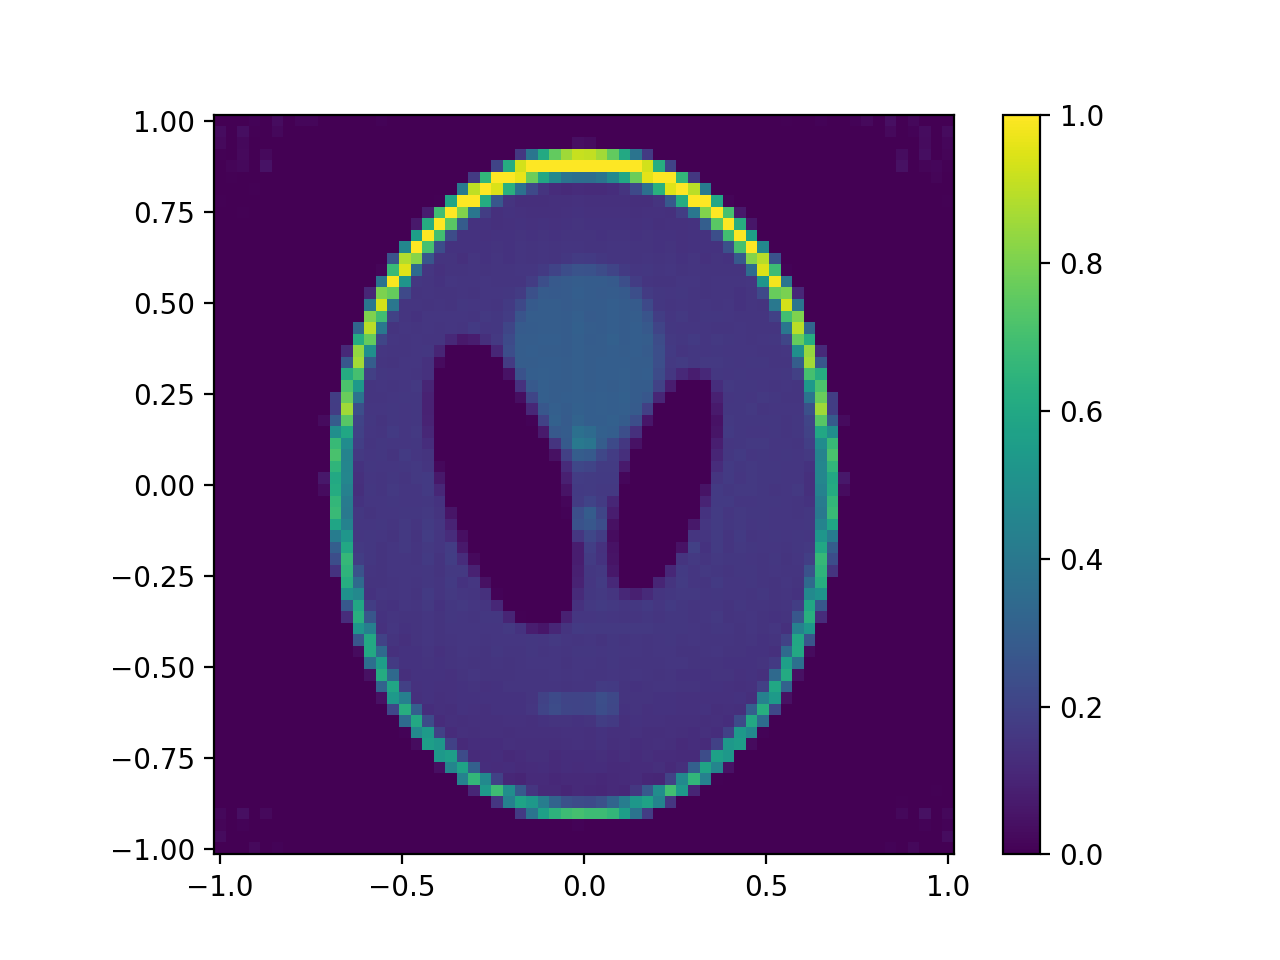

In [22]:
fig, ax = plt.subplots()
im = grid.plot(ax, x_hat_fbp, vmin=0, vmax=1)
fig.colorbar(im);

In [23]:
grid_y_ft, y_ft = grid_y.spectrum(y, axis=0)

<IPython.core.display.Javascript object>


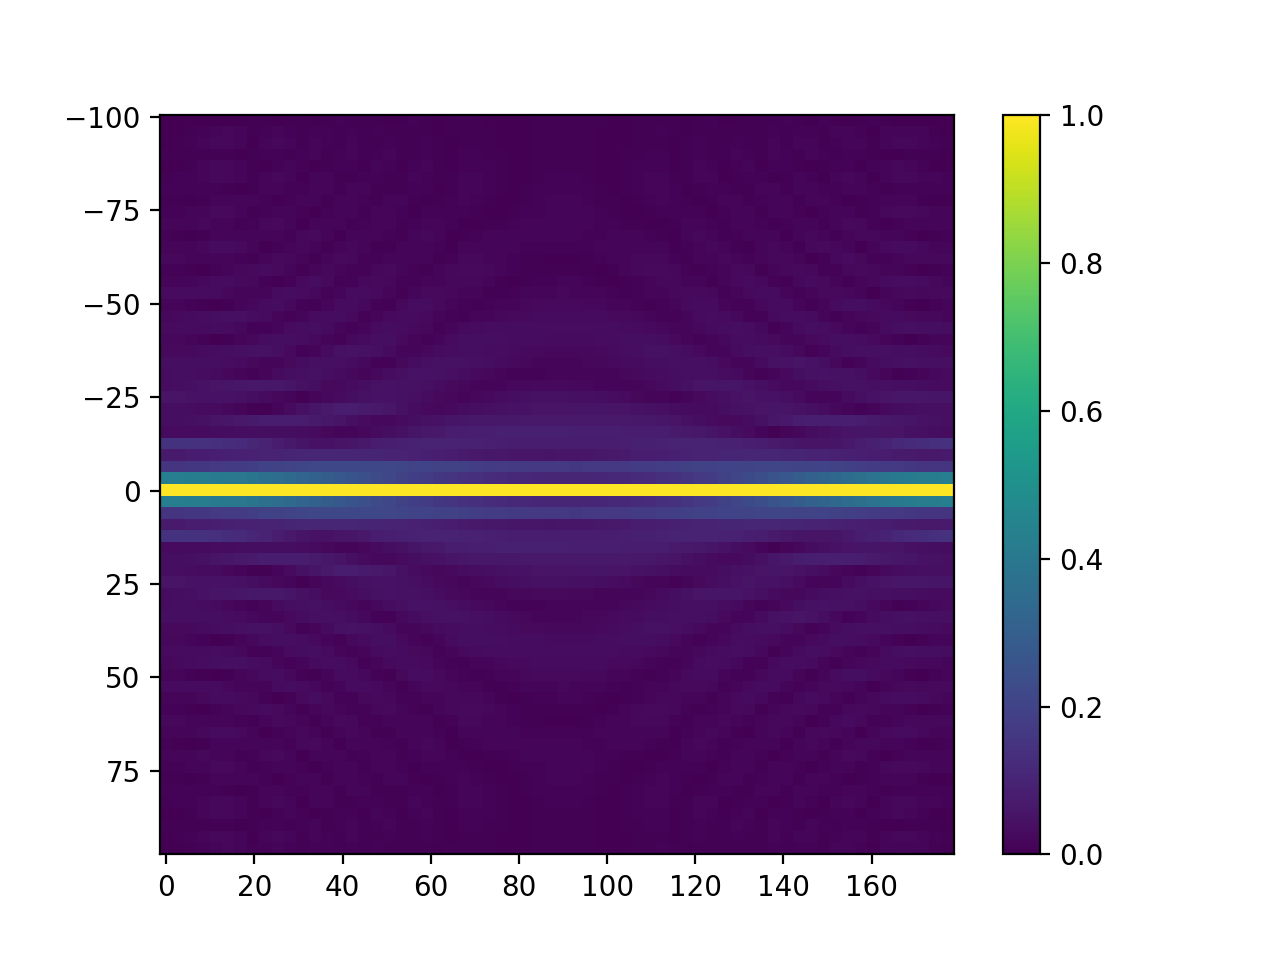

In [24]:
fig, ax = plt.subplots()
grid_y_ft.plot(ax, np.abs(y_ft), aspect='auto')
fig.colorbar(im)

In [25]:
W_grid = np.abs(grid_y_ft.axis_y.centers / (2 * np.pi)) * 2

<IPython.core.display.Javascript object>


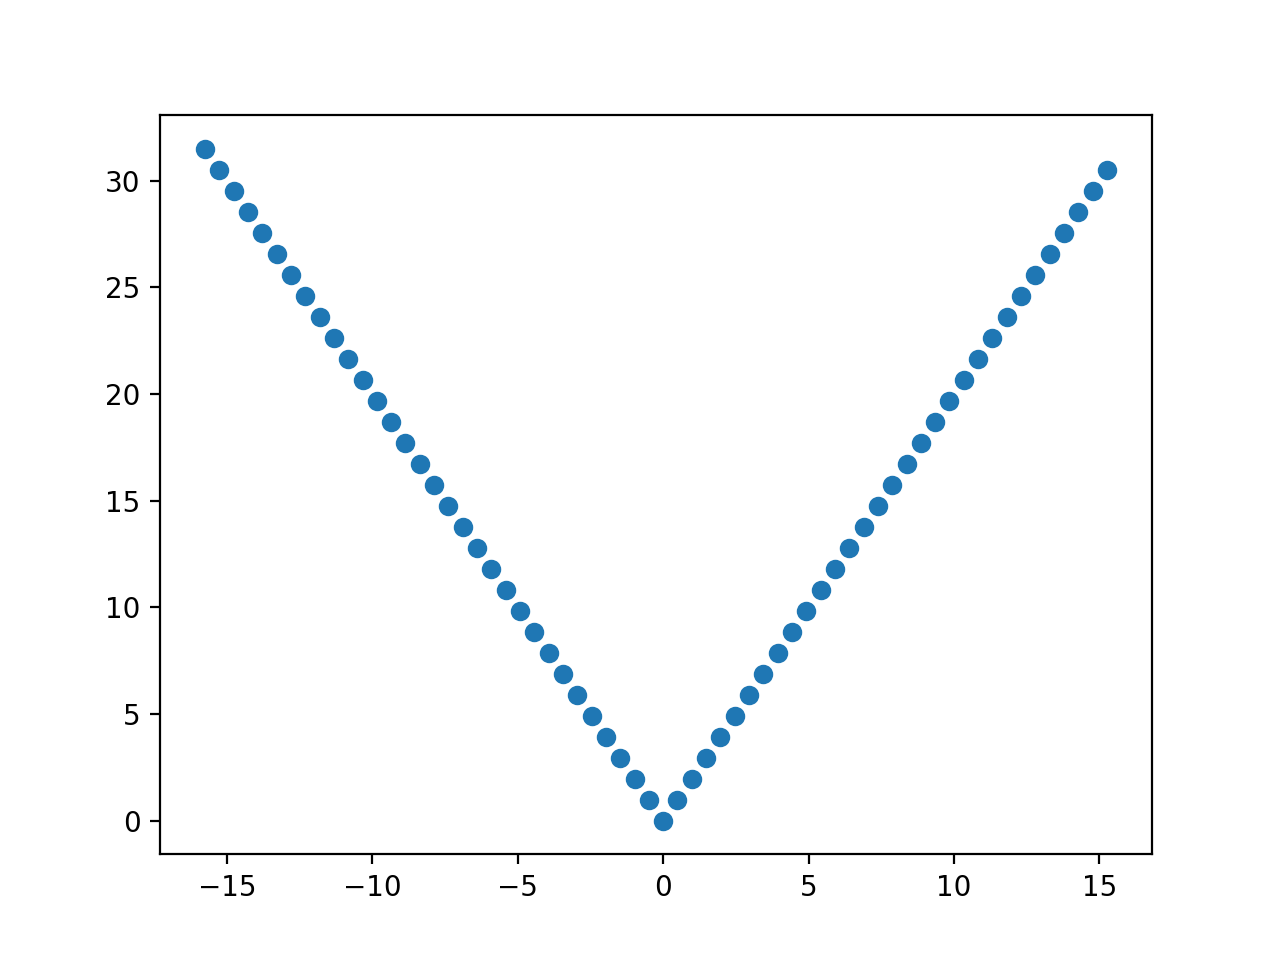

In [26]:
fig, ax = plt.subplots()
plt.scatter(grid_y_ft.axis_y.centers / (2 * np.pi), W_grid);

In [27]:
grid_z_no_filter, z_no_filter = grid_y_ft.ispectrum(y_ft, axis=0)

In [28]:
np.max(np.imag(z_no_filter))

4.966065232295522e-17

<IPython.core.display.Javascript object>


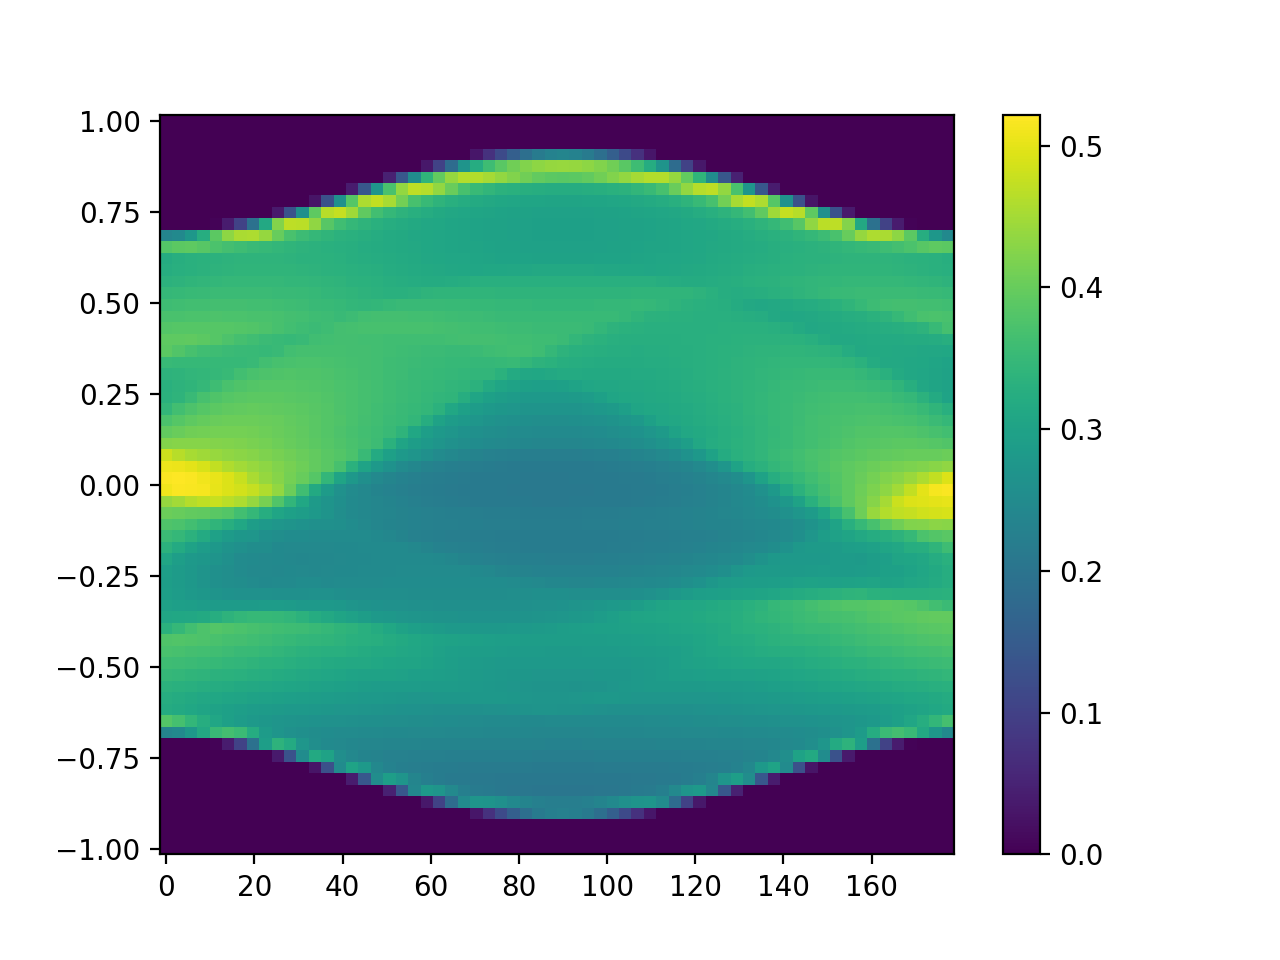

In [29]:
fig, ax = plt.subplots()
im = grid_z_no_filter.plot(ax, np.real(z_no_filter), aspect='auto')
fig.colorbar(im);

In [30]:
grid_z_filter, z_filter = grid_y_ft.ispectrum(np.atleast_2d(W_grid).T * y_ft, axis=0)

In [31]:
np.max(np.abs(np.imag(z_filter)))

2.6020852139652106e-16

In [32]:
z_filter = np.real(z_filter)

<IPython.core.display.Javascript object>


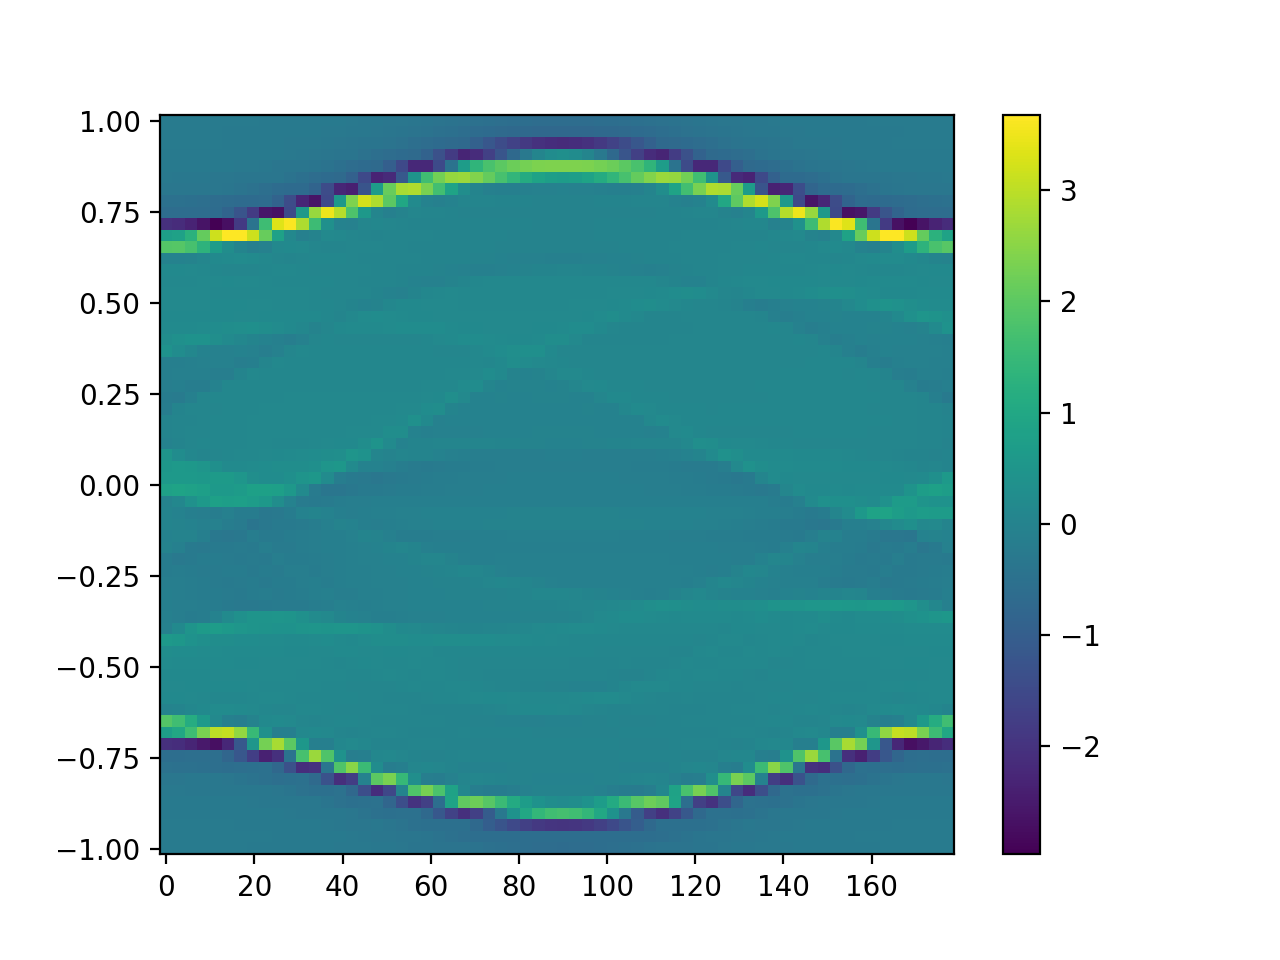

In [33]:
fig, ax = plt.subplots()
im = grid_z_filter.plot(ax, z_filter, aspect='auto')
fig.colorbar(im);

In [34]:
x_hat_fbp = R.T @ z_filter.flat
x_hat_fbp.shape = Ny, Nx

<IPython.core.display.Javascript object>


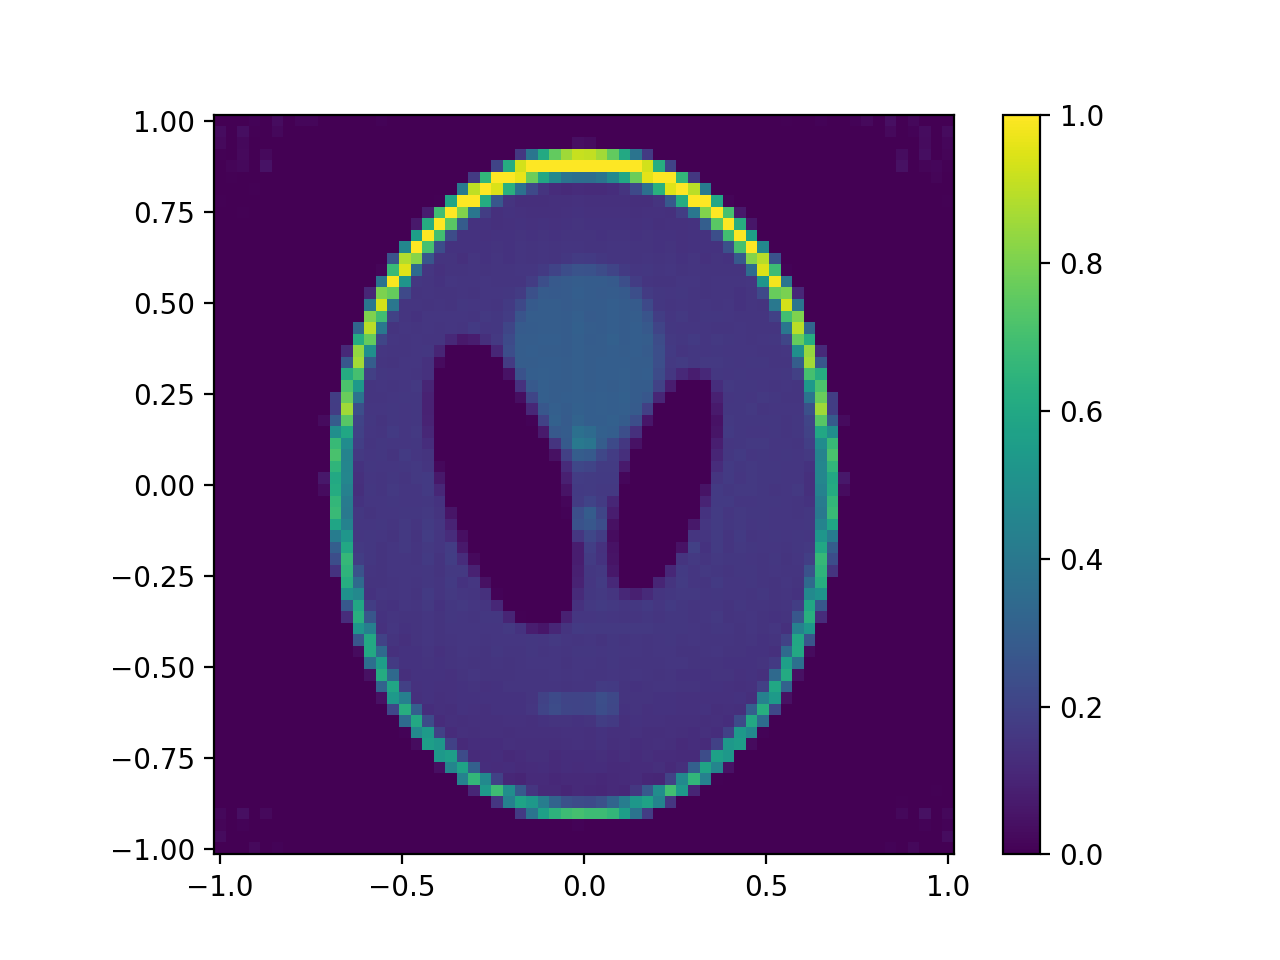

In [35]:
fig, ax = plt.subplots()
im = grid.plot(ax, x_hat_fbp, vmin=0, vmax=1)
fig.colorbar(im);

In [36]:
P = np.exp(1j*grid_y_ft.axis_y.centers*grid_y.axis_y.x0)

In [37]:
np.max(np.imag(scipy.fft.ifft(np.atleast_2d(P).T * y_ft, axis=0)))

1.6603156023409011e-18

In [38]:
z_no_filter2 = np.real(scipy.fft.ifft(np.atleast_2d(P).T * y_ft, axis=0))

<IPython.core.display.Javascript object>


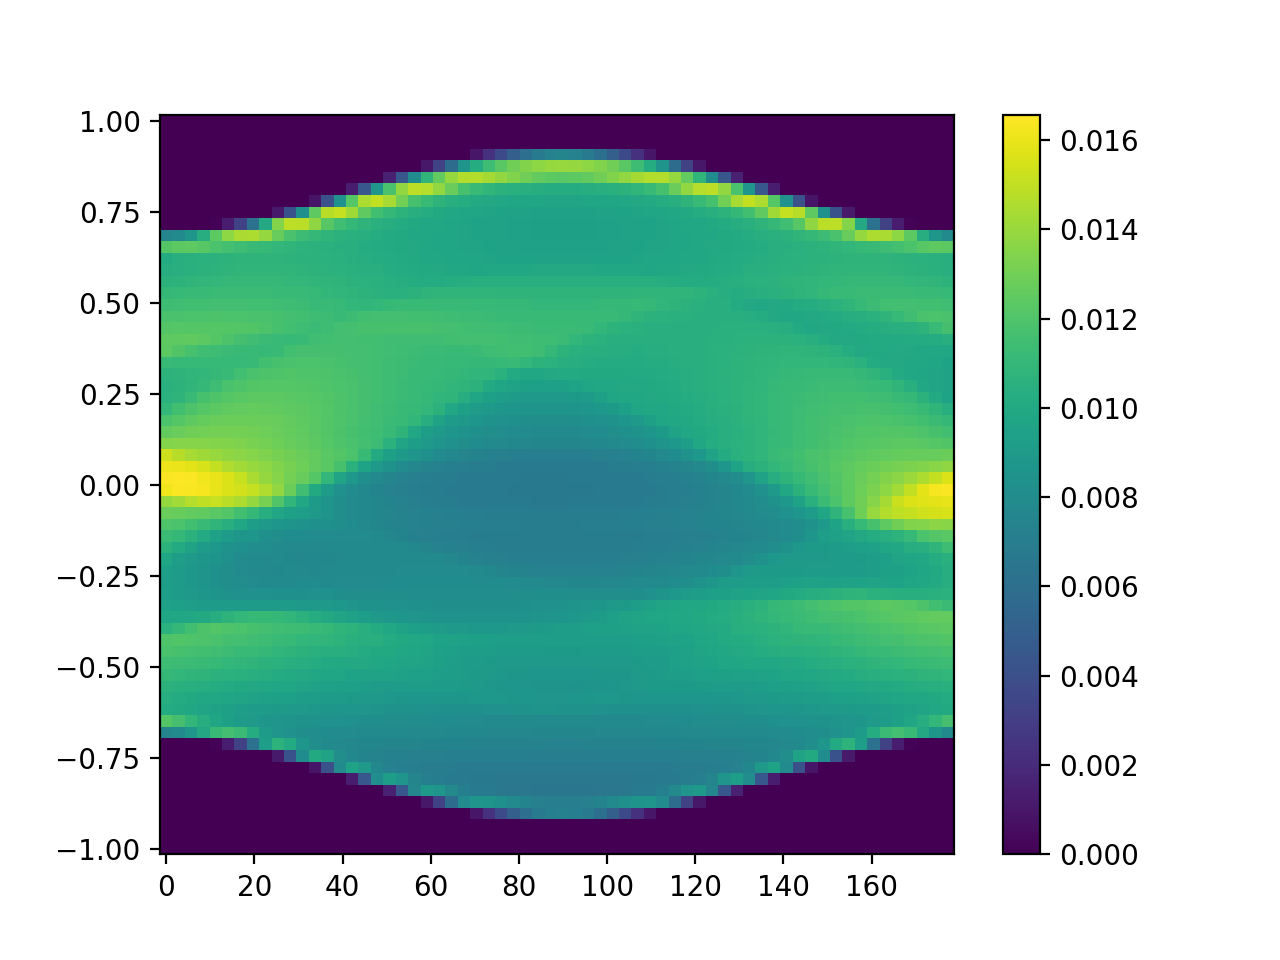

In [39]:
fig, ax = plt.subplots()
im = grid_z_no_filter.plot(ax, z_no_filter2, aspect='auto')
fig.colorbar(im);

In [40]:
z_filter2 = np.real(scipy.fft.ifft(np.atleast_2d(P).T * y_ft * np.atleast_2d(W).T, axis=0)) * 2 / axis_t.T

<IPython.core.display.Javascript object>


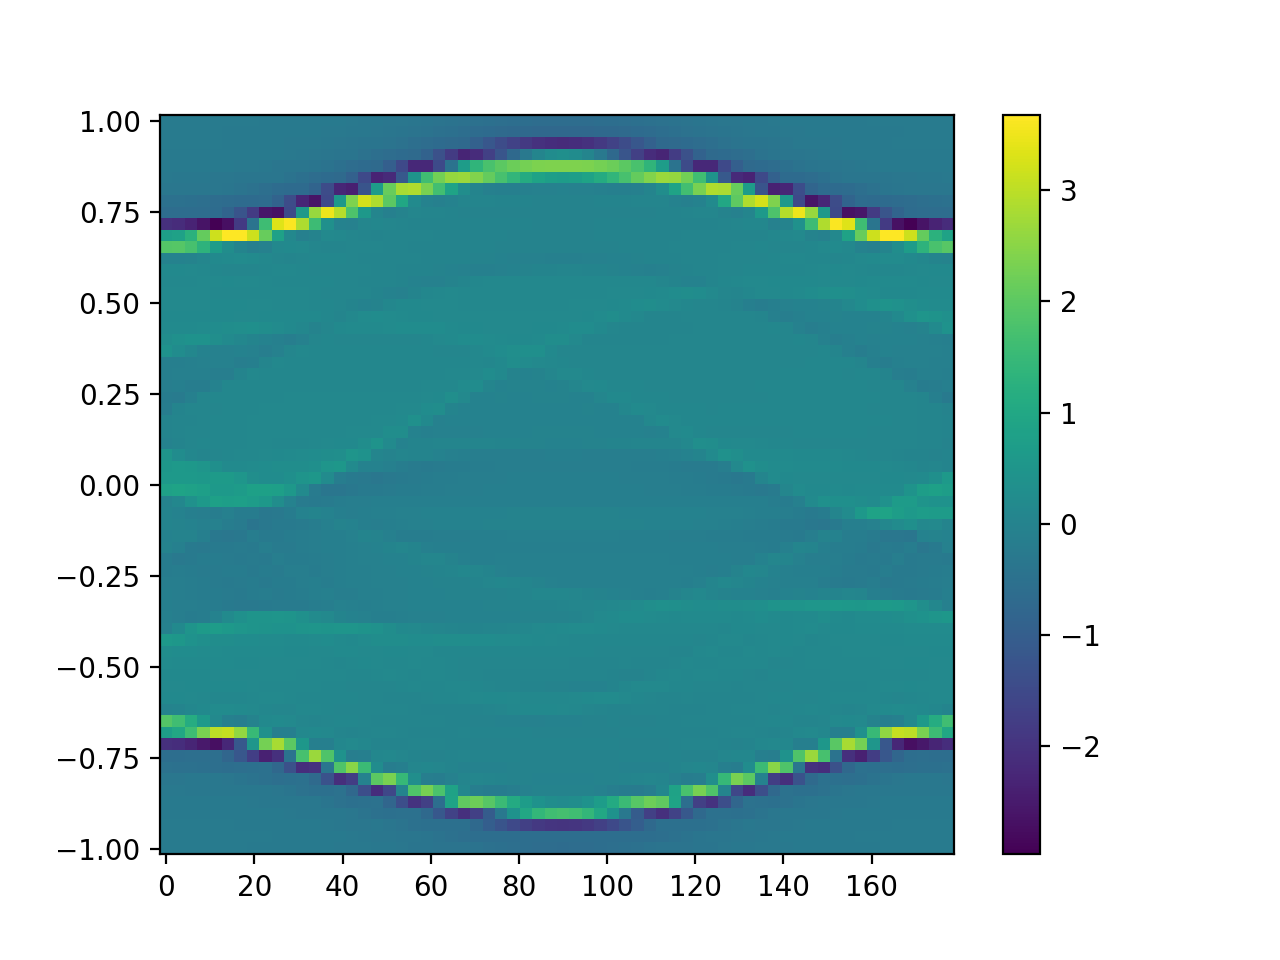

In [41]:
fig, ax = plt.subplots()
im = grid_z_no_filter.plot(ax, np.real(z_filter2), aspect='auto')
fig.colorbar(im);

In [42]:
x_hat_fbp2 = R.T @ z_filter2.flat
x_hat_fbp2.shape = Ny, Nx

<IPython.core.display.Javascript object>


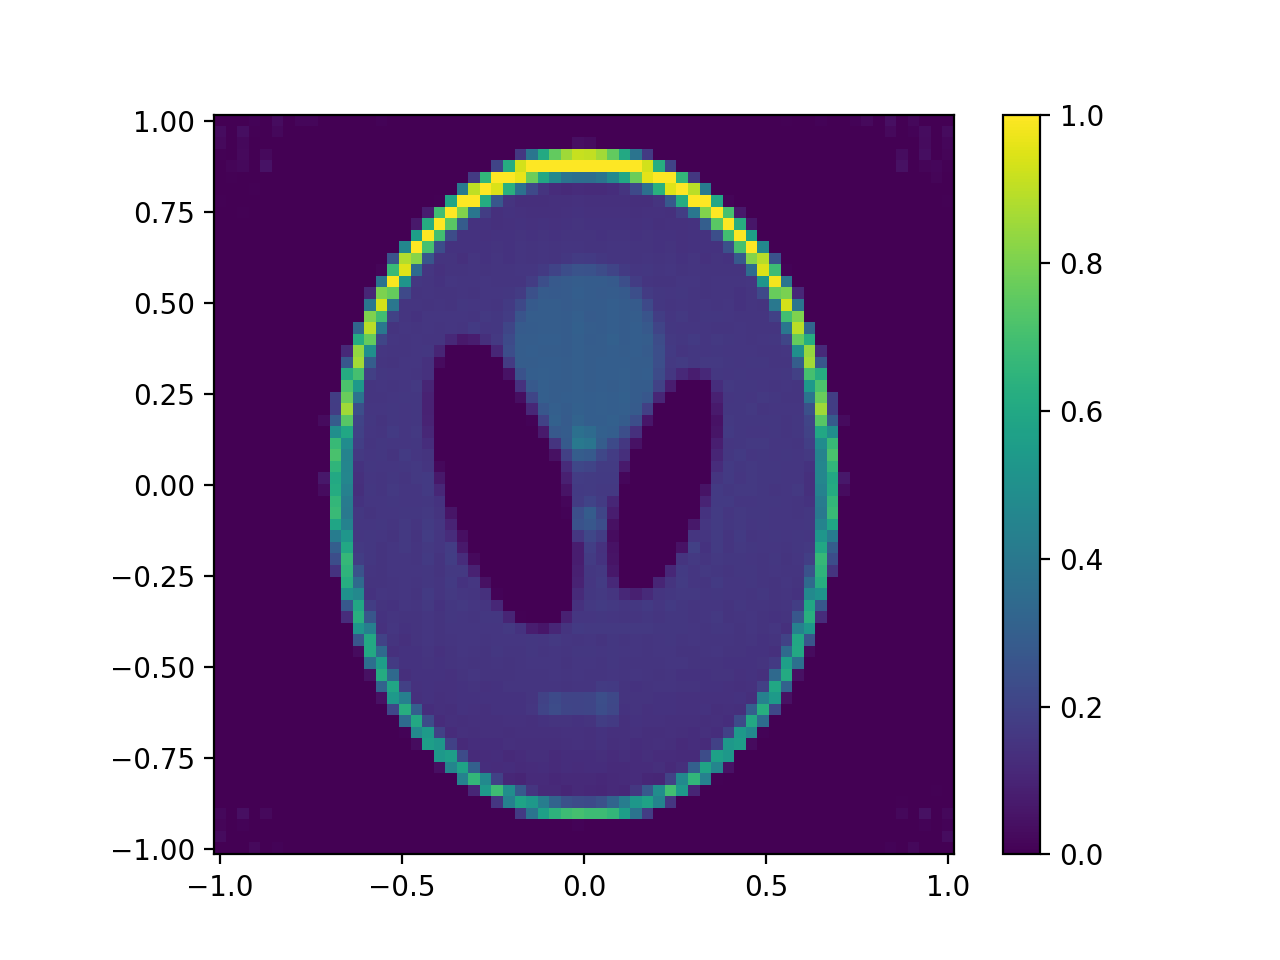

In [43]:
fig, ax = plt.subplots()
im = grid.plot(ax, x_hat_fbp2, vmin=0, vmax=1)
fig.colorbar(im);